# Import libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import mllib

# Import data

In [6]:
trainingData = pd.read_csv('csv/trainingData.csv')

In [7]:
validationData = pd.read_csv('csv/validationData.csv')

In [8]:
accuracy_df = pd.read_csv('csv/visualization/accuracy_df.csv')

In [9]:
perfomance_time_cl_df= pd.read_csv('csv/visualization/perfomance_time_cl_df.csv')

In [10]:
regression_models = pd.read_csv('csv/visualization/regression_models.csv')

In [11]:
positions_df_actual_test = pd.read_csv('csv/visualization/positions_df_actual_test.csv',index_col=0)

In [12]:
positions_df_pred_test = pd.read_csv('csv/visualization/positions_df_pred_test.csv',index_col=0)

In [13]:
positions_df_actual_val = pd.read_csv('csv/visualization/positions_df_actual_val.csv',index_col=0)

In [14]:
positions_df_pred_val = pd.read_csv('csv/visualization/positions_df_pred_val.csv',index_col=0)

In [15]:
positions_df_actual_train = pd.read_csv('csv/visualization/positions_df_actual_train.csv',index_col=0)

In [16]:
positions_df_pred_train = pd.read_csv('csv/visualization/positions_df_pred_train.csv',index_col=0)

In [17]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [18]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [19]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

In [20]:
building_floor_df_train = pd.read_csv('csv/visualization/building_floor_df_train.csv',index_col=0)
building_floor_df_test = pd.read_csv('csv/visualization/building_floor_df_test.csv',index_col=0)
building_floor_df_val = pd.read_csv('csv/visualization/building_floor_df_val.csv',index_col=0)

# Visualization: building, floor

## Accuracy of models

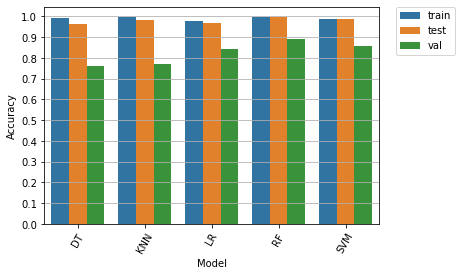

In [21]:
sns.barplot(data = accuracy_df, x = "model", y = "accuracy", 
            hue = "set")
#plt.title('BUILDING: '+ str(building) +' TARGET: '+ target)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y')
plt.show()

## Training time

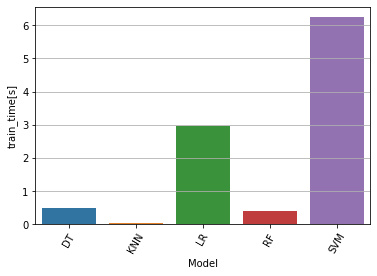

In [22]:
sns.barplot(data = perfomance_time_cl_df, x = "model", y = "train_time")
#plt.title('BUILDING: '+ str(building) +' TARGET: '+ target)
plt.xlabel("Model")
plt.ylabel("train_time[s]")
plt.xticks(rotation = 60)
#plt.yticks(np.arange(0, 1.01, step=0.1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(axis='y')

## Source of Error

Source of error in train data:

In [23]:
trainingData['building_floor'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']

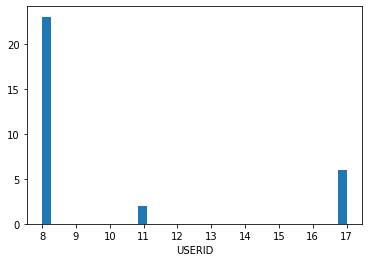

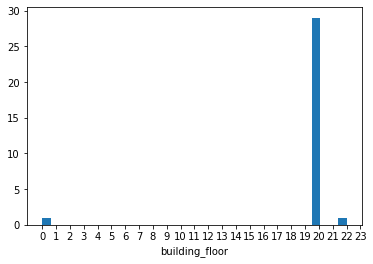

In [24]:
train_error_ind = building_floor_df_train.query('building_floor != building_floor_pred').index
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(trainingData.loc[train_error_ind,:].USERID, bins=35) 
plt.show()


train_error_ind = building_floor_df_train.query('building_floor != building_floor_pred').index
plt.xticks( np.arange(0, 35) )
plt.xlabel('building_floor')
plt.hist(trainingData.loc[train_error_ind,:].building_floor, bins=35) 
plt.show()


Source of error in test data:

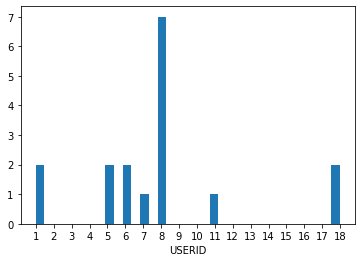

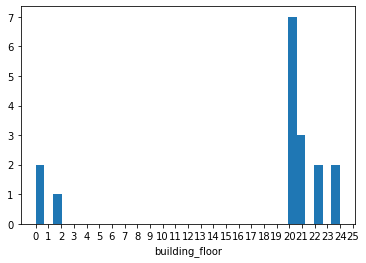

In [25]:
test_error_ind = building_floor_df_test.query('building_floor != building_floor_pred').index
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(trainingData.loc[test_error_ind,:].USERID,bins=35) 
plt.show()

plt.xticks( np.arange(0, 35) )
plt.xlabel('building_floor')
plt.hist(trainingData.loc[test_error_ind,:].building_floor, bins=35) 
plt.show()

Source of error in validation data (USERID is not given!):

In [26]:
validationData['building_floor'] = validationData['BUILDINGID']*10 + trainingData['FLOOR']

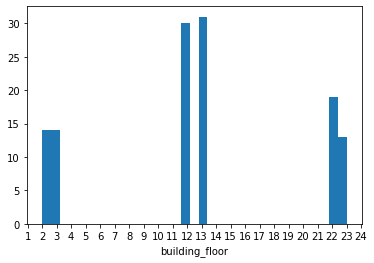

In [27]:
val_error_ind = building_floor_df_val.query('building_floor != building_floor_pred').index

plt.xticks( np.arange(0, 35) )
plt.xlabel('building_floor')
plt.hist(validationData.loc[val_error_ind,:].building_floor, bins=35) 
plt.show()

# Visualization: lat, long

## MSE, R2

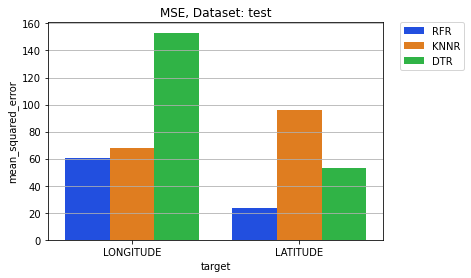

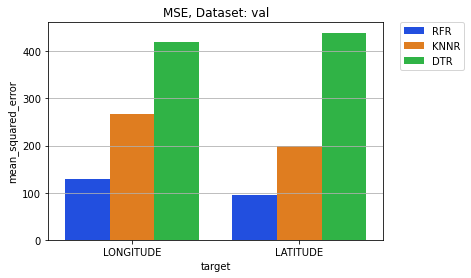

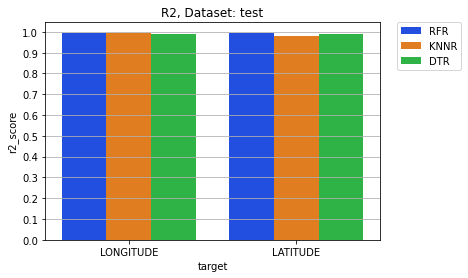

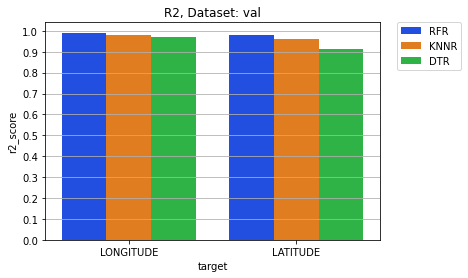

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

for ds in regression_models.dataset.unique():
    
    data = regression_models.query('dataset == @ds')
    # plot MSE
    plt.title('MSE, Dataset: '+ds)
    plt.grid(axis='y')
    sns.barplot(data = data, x = "target", y = "mean_squared_error", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
for ds in regression_models.dataset.unique():   
    data = regression_models.query('dataset == @ds')
    # plot R2
    plt.title('R2, Dataset: '+ds)
    plt.grid(axis='y')
    plt.yticks(np.arange(0, 1.01, step=0.1))
    sns.barplot(data = data, x = "target", y = "r2_score", 
                hue = "model", palette = "bright")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [29]:
regression_models

,Unnamed: 0,target,model,dataset,mean_squared_error,r2_score,train_time
0,0,LONGITUDE,RFR,test,60.509033,0.996133,1.255594
1,1,LONGITUDE,RFR,val,129.468025,0.991032,1.255594
2,2,LONGITUDE,KNNR,test,67.855356,0.995664,0.012078
3,3,LONGITUDE,KNNR,val,267.438531,0.981476,0.012078
4,4,LONGITUDE,DTR,test,153.132047,0.990214,0.446062
5,5,LONGITUDE,DTR,val,420.768915,0.970855,0.446062
6,6,LATITUDE,RFR,test,23.228015,0.994843,1.213114
7,7,LATITUDE,RFR,val,96.092907,0.980524,1.213114
8,8,LATITUDE,KNNR,test,96.092907,0.980524,0.015399
9,9,LATITUDE,KNNR,val,198.412967,0.959785,0.015399


## Distance error

Distance error could be calculated as ERROR(DISTANCE) = SQRT(ERROR(LONGITUDE)^2+ERROR(LATITUDE)^2)

In [30]:
# calculate distance error and collect data in df
distance_error_models = pd.DataFrame(columns=['model','dataset','distance_error'])
for ds in regression_models.dataset.unique():
    data_ds = regression_models.query('dataset == @ds')
    for mdl in regression_models.model.unique():
        data_ds_mdl = data_ds.query('model == @mdl')
        distance_error = data_ds_mdl['mean_squared_error'].sum()**0.5
        temp_df = pd.DataFrame({'model':[mdl],
                                'dataset':[ds],
                                'distance_error':[distance_error]})

        distance_error_models = distance_error_models.append(temp_df,
                                                             ignore_index=True)

In [31]:
distance_error_models

,model,dataset,distance_error
0,RFR,test,9.150795
1,KNNR,test,12.804228
2,DTR,test,14.361769
3,RFR,val,15.018686
4,KNNR,val,21.583593
5,DTR,val,29.331039


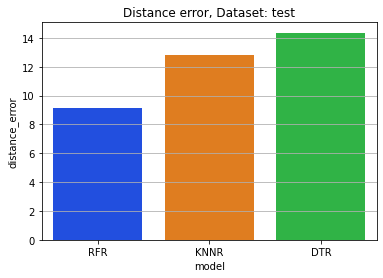

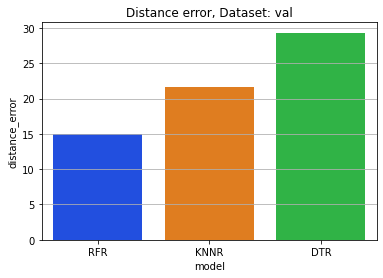

In [32]:
for ds in distance_error_models.dataset.unique(): 
    data = distance_error_models.query('dataset == @ds')
    # plot MSE
    plt.title('Distance error, Dataset: '+ds)
    plt.grid(axis='y')
    sns.barplot(data = data, x = "model", y = "distance_error", 
               palette = "bright")
    plt.show()

## Training time

<AxesSubplot:title={'center':'train_time[s]'}, xlabel='target', ylabel='train_time'>

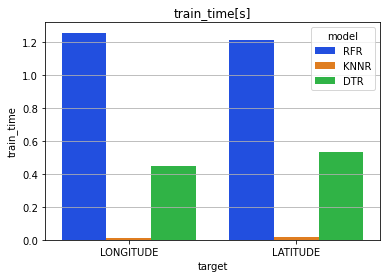

In [33]:
data = regression_models.query('dataset == "test"')
# plot MSE
plt.title('train_time[s]')
plt.grid(axis='y')
sns.barplot(data = data, x = "target", y = "train_time", 
            hue = "model", palette = "bright")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## Predicted vs actual position

In [34]:
# absolute distance error of predicted positions TRAIN
positions_df_pred_train['abs_error_distance'] = ((positions_df_actual_train.LONGITUDE-positions_df_pred_train.LONGITUDE)**2+
(positions_df_actual_train.LATITUDE-positions_df_pred_train.LATITUDE)**2)**0.5

In [35]:
positions_df_pred_train['FLOOR']= trainingData.loc[positions_df_pred_train.index,'FLOOR']

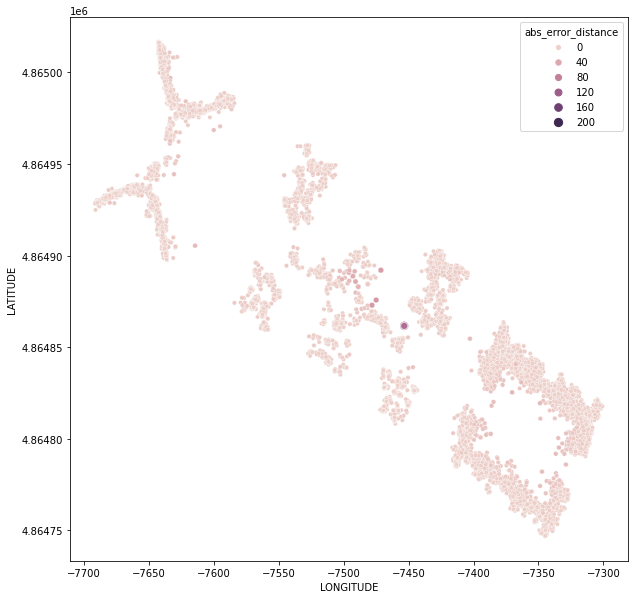

In [36]:
# show all predicted positions in train

plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_train,
                x = 'LONGITUDE',
                y = 'LATITUDE',
               hue='abs_error_distance',
               size="abs_error_distance")
plt.show()

In [37]:
# absolute distance error of predicted positions TEST
positions_df_pred_test['abs_error_distance'] = ((positions_df_actual_test.LONGITUDE-positions_df_pred_test.LONGITUDE)**2+
(positions_df_actual_test.LATITUDE-positions_df_pred_test.LATITUDE)**2)**0.5

In [38]:
positions_df_pred_test['FLOOR']= trainingData.loc[positions_df_pred_test.index,'FLOOR']

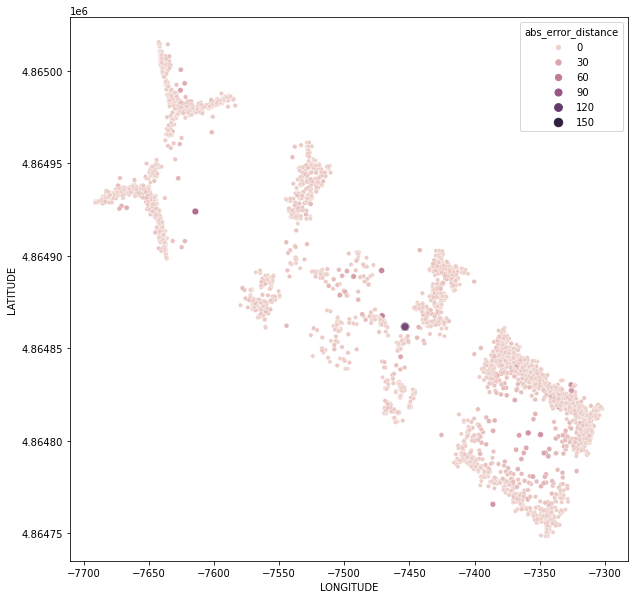

In [39]:
# show all predicted positions in test
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_test, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_test,
                x = 'LONGITUDE',
                y = 'LATITUDE',
               hue='abs_error_distance',
               size="abs_error_distance")
plt.show()

In [40]:
# absolute distance error of predicted positions VALIDATION
positions_df_pred_val['abs_error_distance'] = ((positions_df_actual_val.LONGITUDE-positions_df_pred_val.LONGITUDE)**2+
(positions_df_actual_val.LATITUDE-positions_df_pred_val.LATITUDE)**2)**0.5

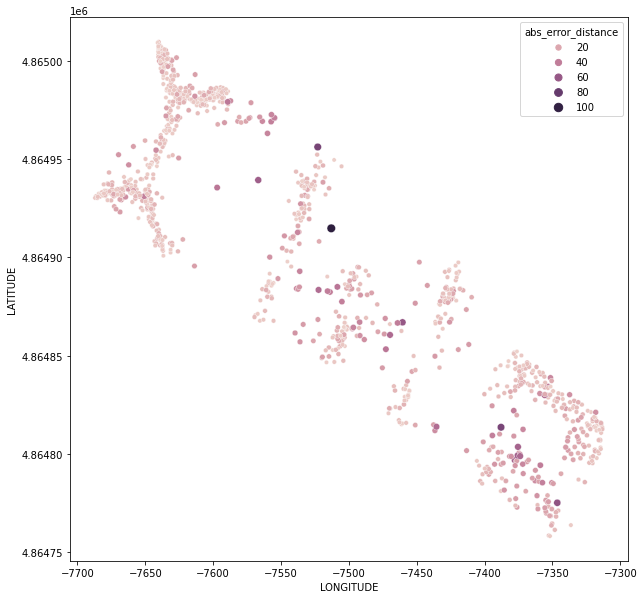

In [41]:
# show all predicted positions in validation
plt.figure(figsize = (10,10))
plt.xlabel("LONGITUDE")
#sns.scatterplot(data = positions_df_actual_val, x = 'LONGITUDE', y = 'LATITUDE')
sns.scatterplot(data = positions_df_pred_val,
                x = 'LONGITUDE',
                y = 'LATITUDE',
                hue='abs_error_distance',
                size="abs_error_distance")
plt.show()

## Error distribution

### Train dataset

Mean: 2.2700440502780626   Std: 7.224861509417004


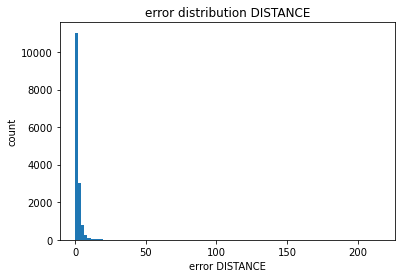

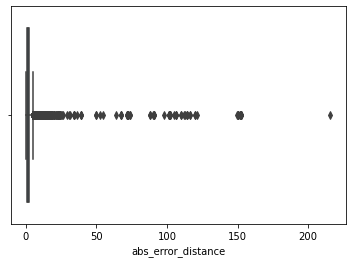

In [42]:
# train
diff_dist_train = positions_df_pred_train['abs_error_distance']
diff_dist_train.index = positions_df_pred_train.index
y = diff_dist_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_dist_train)
plt.show()

Mean: -0.021513592778764804   Std: 6.218211542730522


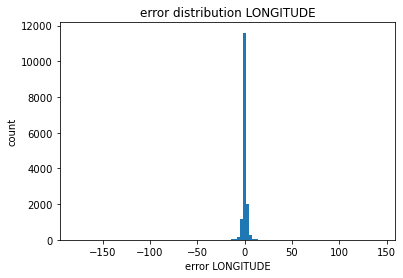

Mean: -0.011131260581507834   Std: 4.322651553985569


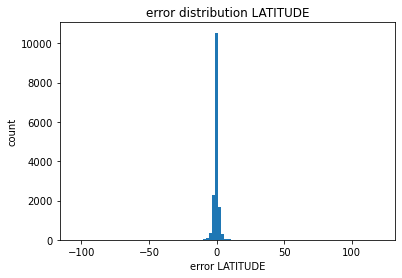

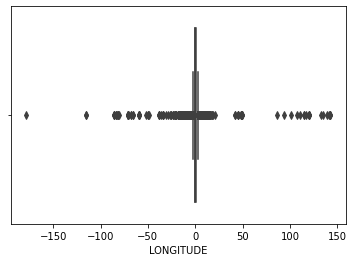

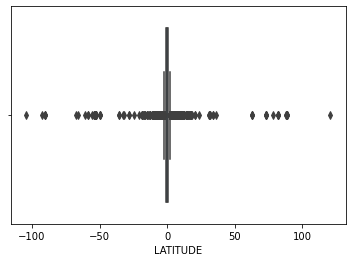

In [43]:
# TEST
diff_long_train = positions_df_actual_train['LONGITUDE'] - positions_df_pred_train['LONGITUDE']
diff_long_train.index = positions_df_actual_train.index
y = diff_long_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_train = positions_df_actual_train['LATITUDE'] - positions_df_pred_train['LATITUDE']
diff_lat_train.index = positions_df_actual_train.index
y = diff_lat_train
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_long_train)
plt.show()

sns.boxplot(x=diff_lat_train)
plt.show()

### Test dataset

Mean: 4.429129271832906   Std: 8.008526366253191


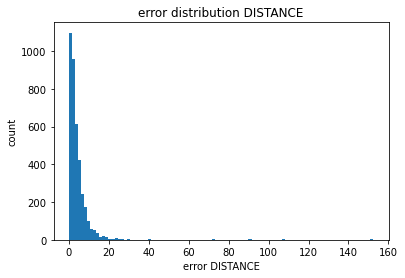

<AxesSubplot:xlabel='abs_error_distance'>

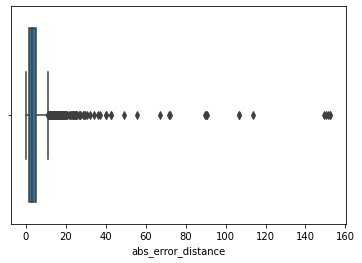

In [44]:
# test
diff_dist_test = positions_df_pred_test['abs_error_distance']
diff_dist_test.index = positions_df_pred_test.index
y = diff_dist_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_dist_test)

Mean: 0.07963167453752916   Std: 7.77935643644095


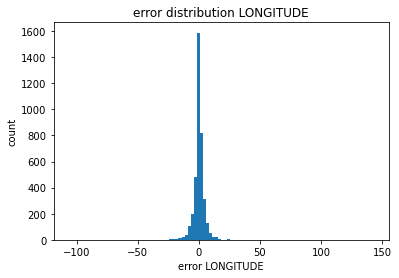

Mean: -0.040248970285925584   Std: 4.820002034881073


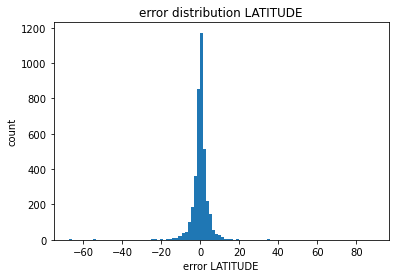

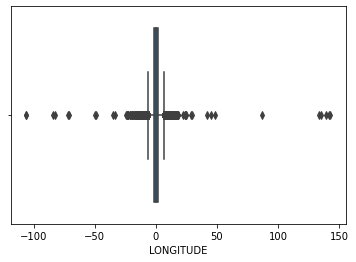

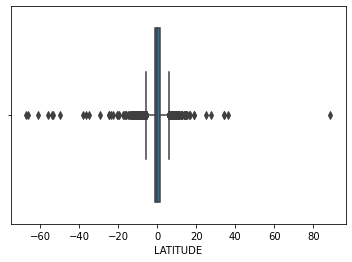

In [45]:
# TEST
diff_long_test = positions_df_actual_test['LONGITUDE'] - positions_df_pred_test['LONGITUDE']
diff_long_test.index = positions_df_actual_test.index
y = diff_long_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_test = positions_df_actual_test['LATITUDE'] - positions_df_pred_test['LATITUDE']
diff_lat_test.index = positions_df_actual_test.index
y = diff_lat_test
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_long_test)
plt.show()
sns.boxplot(x=diff_lat_test)
plt.show()

### Validation dataset

Mean: 11.176145950461493   Std: 10.03719953068211


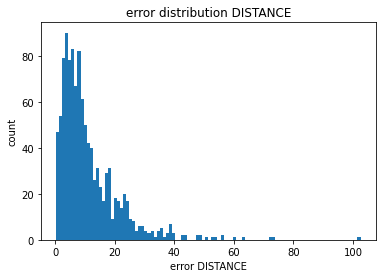

<AxesSubplot:xlabel='abs_error_distance'>

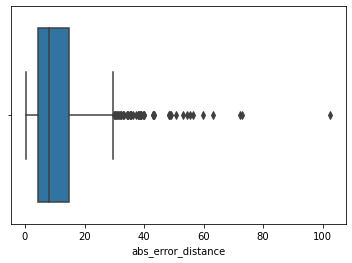

In [46]:
# VALIDATION - DISTANCE
diff_dist_val = positions_df_pred_val['abs_error_distance']
diff_dist_val.index = positions_df_pred_val.index
y = diff_dist_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error DISTANCE')
plt.ylabel("count")
plt.title('error distribution DISTANCE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_dist_val)

Mean: -1.1008086361888878   Std: 11.330127625031823


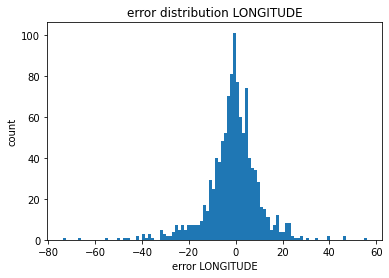

Mean: -1.176443138479194   Std: 9.736231930239239


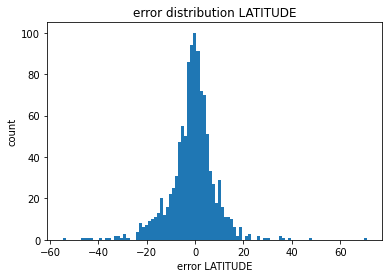

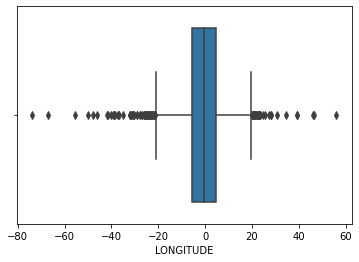

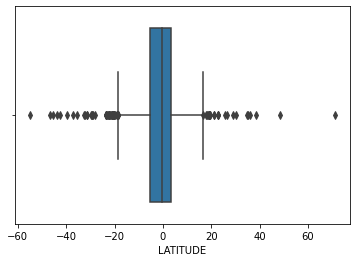

In [47]:
# VALIDATION - LATITUDE & LONGITUDE
diff_long_val = positions_df_actual_val['LONGITUDE'] - positions_df_pred_val['LONGITUDE']
diff_long_val.index = positions_df_actual_val.index
y = diff_long_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LONGITUDE')
plt.ylabel("count")
plt.title('error distribution LONGITUDE')
plt.hist(y, bins = 100)
plt.show()

diff_lat_val = positions_df_actual_val['LATITUDE'] - positions_df_pred_val['LATITUDE']
diff_lat_val.index = positions_df_actual_val.index
y = diff_lat_val
print('Mean:',y.mean(),' ','Std:',y.std())
plt.xlabel('error LATITUDE')
plt.ylabel("count")
plt.title('error distribution LATITUDE')
plt.hist(y, bins = 100)
plt.show()

sns.boxplot(x=diff_long_val)
plt.show()

sns.boxplot(x=diff_lat_val)
plt.show()

## Outliers

### Train data

#### Distance error

In [48]:
lim_train_dist1,lim_train_dist2 = mllib.getOutlierLimits(diff_dist_train)

In [49]:
diff_dist_train_df = pd.DataFrame(diff_dist_train)
index_outliers_dist_train  = diff_dist_train_df.query('(abs_error_distance < @lim_train_dist1) or (abs_error_distance>@lim_train_dist2)')

In [50]:
index_outliers_dist_train_ind = index_outliers_dist_train.index

(array([ 35.,   0.,  68.,   0.,   4.,   0.,   9.,   0.,  89.,   0.,  28.,
          0.,  73.,   0.,  90.,   0.,  27.,   0.,  20.,   0., 166.,   0.,
         21.,   0.,  79.,   0.,  32.,   0.,  44.,   0.,  28.,   0.,  97.,
          0.,  47.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

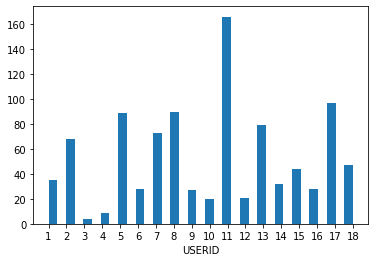

In [51]:
data = trainingData.loc[index_outliers_dist_train_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

#### Latitude, longitude

In [52]:
lim_train_lat1,lim_train_lat2 = mllib.getOutlierLimits(diff_lat_train)

In [53]:
lim_train_long1,lim_train_long2 = mllib.getOutlierLimits(diff_long_train)

In [54]:
diff_lat_train_df = pd.DataFrame(diff_lat_train)
index_outliers_lat_train  = diff_lat_train_df.query('(LATITUDE < @lim_train_lat1) or (LATITUDE>@lim_train_lat2)')
diff_long_train_df = pd.DataFrame(diff_long_train)
index_outliers_long_train  = diff_long_train_df.query('(LONGITUDE < @lim_train_long1) or (LONGITUDE>@lim_train_long2)')

In [55]:
# find indexes of ALL outliers
outliers_train_long_ind =  list(index_outliers_long_train.index) 
outliers_train_lat_ind = list(index_outliers_lat_train.index)
outliers_train_ind = list(set(outliers_train_long_ind + outliers_train_lat_ind))

(array([174.,   0., 238.,   0.,  20.,   0.,  51.,   0., 192.,   0.,  95.,
          0., 319.,   0., 185.,   0., 137.,   0., 137.,   0., 847.,   0.,
         90.,   0.,  92.,   0., 146.,   0., 162.,   0., 124.,   0., 237.,
          0., 140.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

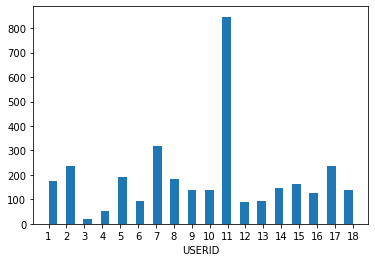

In [56]:
data = trainingData.loc[outliers_train_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([100.,   0., 254.,   0., 603.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

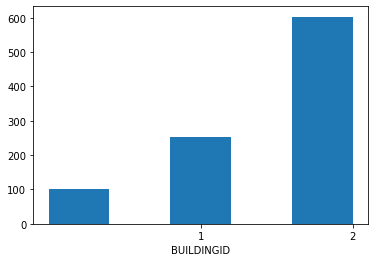

In [78]:
data = trainingData.loc[index_outliers_dist_train_ind,:]
plt.xticks(np.arange(1, 26))
plt.xlabel('BUILDINGID')
plt.hist(data.BUILDINGID,bins=5)

### Test dataset

#### Distance error

In [58]:
lim_test_dist1,lim_test_dist2 = mllib.getOutlierLimits(diff_dist_test)

In [59]:
diff_dist_test_df = pd.DataFrame(diff_dist_test)
index_outliers_dist_test  = diff_dist_test_df.query('(abs_error_distance < @lim_test_dist1) or (abs_error_distance>@lim_test_dist2)')

In [60]:
index_outliers_dist_test = index_outliers_dist_test.index

(array([10.,  0., 15.,  0.,  1.,  0.,  0.,  0., 23.,  0.,  9.,  0., 17.,
         0., 17.,  0.,  1.,  0., 10.,  0., 40.,  0.,  3.,  0., 10.,  0.,
         6.,  0., 13.,  0.,  7.,  0., 24.,  0., 14.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

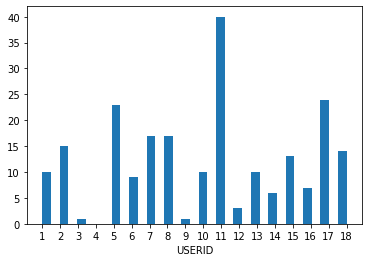

In [61]:
data = trainingData.loc[index_outliers_dist_test,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([ 29.,   0.,  49.,   0., 142.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

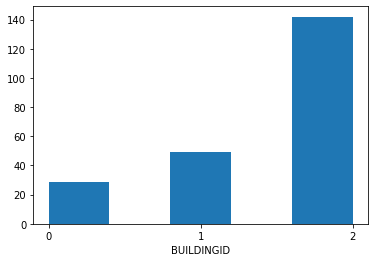

In [79]:
data = trainingData.loc[index_outliers_dist_test,:]
plt.xticks( np.arange(0, 3))
plt.xlabel('BUILDINGID')
plt.hist(data=data, x="BUILDINGID",bins=5)

#### Latitude, longitude

In [63]:
lim_test_lat1,lim_test_lat2 = mllib.getOutlierLimits(diff_lat_test)

In [64]:
lim_test_long1,lim_test_long2 = mllib.getOutlierLimits(diff_long_test)

In [65]:
diff_lat_test_df = pd.DataFrame(diff_lat_test)
index_outliers_lat_test  = diff_lat_test_df.query('(LATITUDE < @lim_test_lat1) or (LATITUDE>@lim_test_lat2)')
diff_long_test_df = pd.DataFrame(diff_long_test)
index_outliers_long_test  = diff_long_test_df.query('(LONGITUDE < @lim_test_long1) or (LONGITUDE>@lim_test_long2)')



Lets try to find out a common pattern for all outliers (by lattitude and by longitude)

In [66]:
# find indexes of ALL outliers
outliers_test_long_ind =  list(index_outliers_long_test.index) 
outliers_test_lat_ind = list(index_outliers_lat_test.index)
outliers_test_ind = list(set(outliers_test_long_ind + outliers_test_lat_ind))

(array([ 24.,   0.,  45.,   0.,   1.,   0.,  10.,   0.,  40.,   0.,  15.,
          0.,  51.,   0.,  42.,   0.,  14.,   0.,  35.,   0., 162.,   0.,
         17.,   0.,  19.,   0.,  28.,   0.,  39.,   0.,  25.,   0.,  38.,
          0.,  40.]),
 array([ 1.        ,  1.48571429,  1.97142857,  2.45714286,  2.94285714,
         3.42857143,  3.91428571,  4.4       ,  4.88571429,  5.37142857,
         5.85714286,  6.34285714,  6.82857143,  7.31428571,  7.8       ,
         8.28571429,  8.77142857,  9.25714286,  9.74285714, 10.22857143,
        10.71428571, 11.2       , 11.68571429, 12.17142857, 12.65714286,
        13.14285714, 13.62857143, 14.11428571, 14.6       , 15.08571429,
        15.57142857, 16.05714286, 16.54285714, 17.02857143, 17.51428571,
        18.        ]),
 <BarContainer object of 35 artists>)

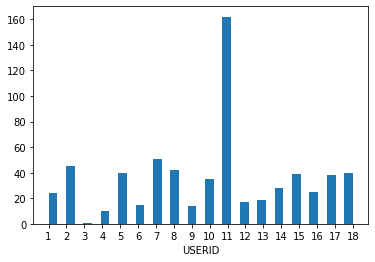

In [67]:
data = trainingData.loc[outliers_test_ind,:]
plt.xticks( np.arange(1, 19) )
plt.xlabel('USERID')
plt.hist(data=data, x="USERID",bins=35)

(array([107.,   0., 181.,   0., 357.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

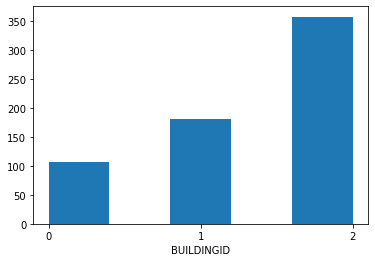

In [80]:
data = trainingData.loc[outliers_test_ind,:]
plt.xticks( np.arange(0, 3))
plt.xlabel('BUILDINGID')
plt.hist(data=data, x="BUILDINGID",bins=5)

### Validation data

#### Distance error

In [69]:
lim_val_dist1,lim_val_dist2 = mllib.getOutlierLimits(diff_dist_val)

In [70]:
diff_dist_val_df = pd.DataFrame(diff_dist_val)
index_outliers_dist_val  = diff_dist_val_df.query('(abs_error_distance < @lim_val_dist1) or (abs_error_distance>@lim_val_dist2)')

In [71]:
index_outliers_dist_val = index_outliers_dist_val.index

In validationData USERID is not given!

#### Latitude, longitude

In [72]:
lim_val_lat1,lim_val_lat2 = mllib.getOutlierLimits(diff_lat_val)

In [73]:
lim_val_long1,lim_val_long2 = mllib.getOutlierLimits(diff_long_val)

In [74]:
diff_lat_val_df = pd.DataFrame(diff_lat_val)
index_outliers_lat_val  = diff_lat_val_df.query('(LATITUDE < @lim_val_lat1) or (LATITUDE>@lim_val_lat2)')
diff_long_val_df = pd.DataFrame(diff_long_val)
index_outliers_long_val  = diff_long_val_df.query('(LONGITUDE < @lim_val_long1) or (LONGITUDE>@lim_val_long2)')

In [75]:
# find indexes of ALL outliers
outliers_val_long_ind =  list(index_outliers_long_val.index) 
outliers_val_lat_ind = list(index_outliers_lat_val.index)
outliers_val_ind = list(set(outliers_val_long_ind + outliers_val_lat_ind))

In [76]:
len(outliers_val_ind)

148

(array([14.,  0.,  0., 20.,  0.,  0., 20.]),
 array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
        1.42857143, 1.71428571, 2.        ]),
 <BarContainer object of 7 artists>)

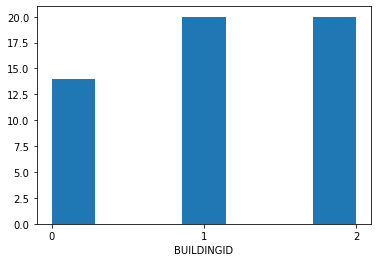

In [81]:
data = validationData.loc[index_outliers_dist_val,:]
plt.xticks( np.arange(0, 3))
plt.xlabel('BUILDINGID')
plt.hist(data=data, x="BUILDINGID",bins=7)